In [1]:
import hydrofunctions as hf
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("ticks")
import random

In [2]:
river='Sydenham_R'

location = (42.598143, -82.364169)

In [3]:
WSC_STATIONS = pd.read_pickle('../Loadings Canada 2/data/WSC_STATIONS')
WSC_FLOWS = pd.read_pickle('../Loadings Canada 2/data/WSC_FLOWS')
WSC_STATIONS = WSC_STATIONS[WSC_STATIONS.Flow == True]

PWQMN = pd.read_pickle('../Loadings Canada 2/data/PWQMN')

elem = 'CHLORIDE,         UNFIL.REAC'
PWQMN = PWQMN[(PWQMN["PARM DESCRIPTION"]==elem) & (PWQMN.UNITS!='FORMAZIN TURBIDITY UNIT')]
# PWQMN.loc[PWQMN.UNITS=='MICROGRAM PER LITER', "RESULT"] = PWQMN.RESULT/1000

PWQMN_LOC = pd.read_excel('../../measurements/PWQMN/PWQMN Locations.xlsx')

GLNI = pd.read_excel('../../measurements/GLNI/Canadian_Tributaries_concentrations_Serghei.xlsx', sheet_name='Data_GLNI_Erie tribs')

elem_name='Chloride dissolved'

GLNI = GLNI[GLNI.VariableCommonName==elem_name]

GLNI.SiteName.unique()

delta = 0.5
near_stations = WSC_STATIONS[(WSC_STATIONS.LATITUDE>location[0]-delta) & (WSC_STATIONS.LATITUDE<location[0]+delta) &
                     (WSC_STATIONS.LONGITUDE>location[1]-delta) & (WSC_STATIONS.LONGITUDE<location[1]+delta)]


Flow_IDS = [[st, False] for st in near_stations.STATION_NUMBER.unique()] 

near_pwqmn_stations = PWQMN_LOC[(PWQMN_LOC.LATITUDE>location[0]-delta) & (PWQMN_LOC.LATITUDE<location[0]+delta) &
                     (PWQMN_LOC.LONGITUDE>location[1]-delta) & (PWQMN_LOC.LONGITUDE<location[1]+delta)]


near_glni_stations = GLNI[(GLNI.Latitude>location[0]-delta) & (GLNI.Latitude<location[0]+delta) &
                     (GLNI.Longitude>location[1]-delta) & (GLNI.Longitude<location[1]+delta)]

near_glni_stations = near_glni_stations[['SiteCode','Latitude','Longitude']]

near_glni_stations = near_glni_stations.rename(index=str, columns={'SiteCode':'STATION', 'Latitude':'Latitude'.upper(), 'Longitude':'Longitude'.upper()})


PWQMN_IDS = [[st, False] for st in set(PWQMN.STATION.unique()).intersection(near_pwqmn_stations.STATION.unique())]

all_near_stations = pd.DataFrame({'STATION':[], 'LONGITUDE':[], 'LATITUDE':[]})

near_stations = near_stations[['STATION_NUMBER', 'LONGITUDE', 'LATITUDE']]

near_stations = near_stations.rename(index=str, columns={'STATION_NUMBER':'STATION'})


near_pwqmn_stations = near_pwqmn_stations[['STATION', 'LONGITUDE', 'LATITUDE']]

all_near_stations = pd.concat([near_stations, near_pwqmn_stations, near_glni_stations])



/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [5]:
PWQMN_IDS = [[st, False] for st in near_pwqmn_stations.STATION.unique()]
GLNI_IDS = [[st, False] for st in near_glni_stations.STATION.unique()]
Flow_IDS = [[st, False] for st in near_stations.STATION.unique()]
# ECCC_IDS = [[st, False] for st in near_eccc_stations.STATION.unique()]

In [96]:
import folium
# import folium.plugins as plugins
from folium.plugins import MiniMap
from folium.plugins.beautify_icon import BeautifyIcon
from folium.features import DivIcon



# m = folium.Map(width=500,height=300, location=location, zoom_start=11.,tiles="OpenStreetMap", attr='Global Water Futures')
m = folium.Map(width=700,height=500, 
                location=location,
               control_scale = True,
                 zoom_start=12.5,
               zoom_control=False,
                 tiles='https://tile.thunderforest.com/outdoors/{z}/{x}/{y}.png?apikey=34dad269f6ab438c9534def56b86fa5f',
                 API_key='34dad269f6ab438c9534def56b86fa5f',
                attr='Global Water Futures')

# show all Flow
# for index, st_dic in enumerate(Flow_IDS):
#     st = st_dic[0]
# #     N = df[df.MonitoringLocationIdentifier==st].shape[0]
# #     if N>10:
#     st_df = near_stations[near_stations.STATION == st]
#     folium.Marker(location=[st_df.LATITUDE.values[0], 
#                             st_df.LONGITUDE.values[0]], 
#                               popup=folium.Popup(html=st_df.STATION.values[0],
#                             show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='gray')
#                  ).add_to(m)



# # show all
if 0:
    for index, st_dic in enumerate(PWQMN_IDS):
        st = st_dic[0]
    # #     N = df[df.MonitoringLocationIdentifier==st].shape[0]
    # #     if N>10:
        st_df = near_pwqmn_stations[near_pwqmn_stations.STATION == st]
        folium.Marker(location=[st_df.LATITUDE.values[0], 
                                st_df.LONGITUDE.values[0]], 
                                  popup=folium.Popup(html=str(st_df.STATION.values[0]),
                                show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='gray')
                     ).add_to(m)
    for index, st_dic in enumerate(GLNI_IDS):
        st = st_dic[0]
    # #     N = df[df.MonitoringLocationIdentifier==st].shape[0]
    # #     if N>10:
        st_df = near_glni_stations[near_glni_stations.STATION == st]
        folium.Marker(location=[st_df.LATITUDE.values[0], 
                                st_df.LONGITUDE.values[0]], 
                                  popup=folium.Popup(html=str(st_df.STATION.values[0]),
                                show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='green')
                     ).add_to(m)
    for index, st_dic in enumerate(Flow_IDS):
        st = st_dic[0]
    # #     N = df[df.MonitoringLocationIdentifier==st].shape[0]
    # #     if N>10:
        st_df = near_stations[near_stations.STATION == st]
        folium.Marker(location=[st_df.LATITUDE.values[0], 
                                st_df.LONGITUDE.values[0]], 
                                  popup=folium.Popup(html=str(st_df.STATION.values[0]),
                                show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='red')
                     ).add_to(m)
else:
    Show_IDS = [
    [4002701702, True],
    ["ON02GC1800", True],
    [4002700602, False],
    ["ON02GG1000", True],
    ["02GG003", True],
    [4002700802, True],
    ["02GG013", True],
    ["02GG009", True],
    [4002700402, False],
    ["02GG006", False],
    ]



    for index, st_dic in enumerate(Show_IDS):
        st = st_dic[0]
        print(st)
        if st_dic[1]:
            clr='#f44242'
        else:
            clr='#0b15c4'
        coef_r = 10
        a,b = random.randrange(-100, 100, 1)*1e-5*coef_r, random.randrange(-100, 100, 1)*1e-5*coef_r
        st_df = all_near_stations[all_near_stations.STATION == st]
        folium.CircleMarker(location=[st_df.LATITUDE.values[0]+a, 
                                st_df.LONGITUDE.values[0]+b], radius=23, 
                            fill=True, fill_color='white',
                                color = clr,fill_opacity=1,
                           weight=5).add_to(m)
        if not index+1 in [1,4]:
            folium.map.Marker(
        location=[st_df.LATITUDE.values[0]+0.0235+a,st_df.LONGITUDE.values[0]-0.1026+b], # 10 km
#         location=[st_df.LATITUDE.values[0]+0.0135+a,st_df.LONGITUDE.values[0]-0.0526+b], # 5km
#         location=[st_df.LATITUDE.values[0]+0.0065+a,st_df.LONGITUDE.values[0]-0.026+b], # 2km
#         location=[st_df.LATITUDE.values[0]+0.0031+a,st_df.LONGITUDE.values[0]-0.013+b], # 1km
            icon=DivIcon(
                icon_size=(150,36),
                icon_anchor=(0,0),
                html='<div style="font-size: 24pt;text-align: center;vertical-align: middle">{}</div>'.format(index+1),
                )
            ).add_to(m)




m







4002701702
ON02GC1800
4002700602
ON02GG1000
02GG003
4002700802
02GG013
02GG009
4002700402
02GG006


In [48]:
selected_stations = [s[0] for s in Show_IDS]

In [8]:
TP_1 = PWQMN[PWQMN.STATION.isin(selected_stations)][['DATE', 'RESULT','STATION']]
TP_1['RESULT'] = pd.to_numeric(TP_1['RESULT'])
# TP_1['RESULT'] = TP_1['RESULT']*(TP_1['RESULT']<20)

TP_2 = GLNI[GLNI.SiteCode.isin(selected_stations)] # [['DATE', 'RESULT','STATION']]
TP_2 = TP_2[['SampleDateTime', 'Value', 'SiteCode']]
TP_2 = TP_2.rename(index=str, columns={'SampleDateTime':'DATE', 'Value':'RESULT', 'SiteCode':'STATION'})

TP = pd.concat([TP_1, TP_2])


TP['RESULT'] = pd.to_numeric(TP['RESULT'])

pt = sns.color_palette("colorblind", len(selected_stations))



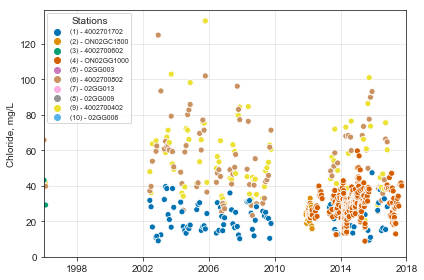

In [9]:
## fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

ax = sns.scatterplot(x='DATE', y='RESULT', data=TP, hue_order=selected_stations, hue='STATION', palette=pt, markers=True)
leg = ["({}) - {}".format(i+1,st) for i, st in enumerate(selected_stations)]

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles[1:], leg, title='Stations', fontsize='x-small', loc='best')

# ax.legend(['(1) - HTLP (NCWQR)'], title='Stations', fontsize='x-small', loc=2)

plt.ylim(0,None)
plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Chloride, mg/L")
plt.xlabel("")
plt.tight_layout()
plt.savefig('Rivers/'+river+'/'+river+'_Cl_meas.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/Canada/'+river+'/'+river+'_Cl_meas.pdf')



In [10]:
print(TP.groupby('STATION')["RESULT"].describe().reindex(selected_stations).round(2).to_latex())
      

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  count &   mean &    std &    min &    25\% &    50\% &    75\% &    max \\
STATION    &        &        &        &        &        &        &        &        \\
\midrule
4002701702 &   95.0 &  22.59 &   8.24 &   9.00 &  15.60 &  22.10 &  28.25 &   47.4 \\
ON02GC1800 &   20.0 &  23.32 &   4.71 &  15.50 &  19.65 &  23.75 &  26.70 &   33.0 \\
4002700602 &    2.0 &  36.20 &   9.90 &  29.20 &  32.70 &  36.20 &  39.70 &   43.2 \\
ON02GG1000 &  360.0 &  29.23 &   7.57 &   8.83 &  23.58 &  29.35 &  33.82 &   59.7 \\
02GG003    &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN \\
4002700802 &   97.0 &  53.57 &  20.27 &  17.90 &  38.40 &  49.90 &  65.80 &  125.0 \\
02GG013    &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN \\
02GG009    &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN \\
4002700402 &   94.0 &  54.69 &  19.91 &  20.50 &  39.32 &  50.05 &  66.15 &  133.0 \\
02GG006    &  

In [11]:
selected_stations

[4002701702,
 'ON02GC1800',
 4002700602,
 'ON02GG1000',
 '02GG003',
 4002700802,
 '02GG013',
 '02GG009',
 4002700402,
 '02GG006']

In [12]:
master_stations = [st[0] for st in Show_IDS if st[1]]
# master_stations = selected_stations
master_st_df = TP[TP.STATION.isin(master_stations)]
master_st_df['USGSPCode'] = 0
master_st_df.shape

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(572, 4)

In [13]:
master_st_df.DATE = master_st_df[master_st_df.DATE>datetime.datetime(1995,12,31)].DATE.dt.date
# = pd.to_date(master_st_df.DATE, format="%Y-%m-%d")
# master_st_df

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [14]:
master_st_df[[
    'DATE','USGSPCode', 'RESULT']].groupby('DATE').mean().reset_index().sort_values('DATE').to_csv(
    'Rivers/'+river+'/Cl_'+river+'iver_data.csv', index=False)

### Discharge

In [15]:
river

'Sydenham_R'

In [67]:
sites = ['02GG003', '02GG009', '02GG013']
total_discharge = pd.DataFrame({})
for site in sites:
    discharge = WSC_FLOWS[WSC_FLOWS.index>datetime.datetime(1996,1,1)][site].to_frame()

    discharge = discharge.reset_index()
    discharge = discharge.rename(index=str, columns={site:'Discharge, cms', 'index':'Date'})
    discharge['Source'] = site
#     total_discharge[site] = discharge['Discharge, cms']
    discharge['Flow, CFS'] = discharge['Discharge, cms']/0.028
    total_discharge = pd.concat([total_discharge, discharge])

In [97]:
discharge = pd.read_excel('../../measurements/ECCC/Discharge_StClair_Detroit_Niagara_Sydenhame_Thames.xlsx')

In [101]:
discharge['Discharge, cms'] = discharge['Sudenham_R']
discharge['Date'] = discharge['DATE']
discharge['Flow, CFS'] = discharge['Discharge, cms']/0.028

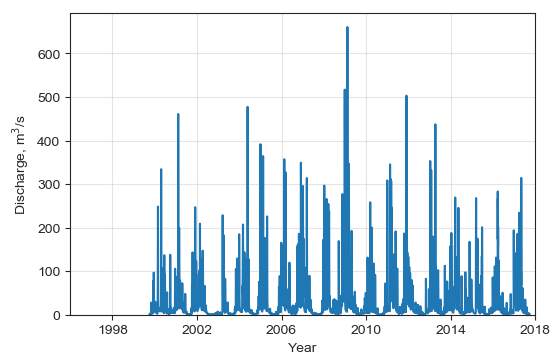

In [100]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
ax=sns.lineplot(x='Date', y='Discharge, cms', data=discharge, ax=ax)

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

# handles, lables = ax.get_legend_handles_labels()
# ax.legend(['({}) - {}'.format(selected_stations.index(site)+1, site) for site in lables[1:]], loc=2, fontsize='small')
ax.set_ylim(0,None)
ax.set_xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
ax.grid(alpha=0.5)
ax.set_ylabel("Discharge, m$^3$/s")
ax.set_xlabel("Year")

# axins = zoomed_inset_axes(ax, 8, loc='upper center')
# sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source', ax=axins,zorder=10)
# axins.set_xlim(datetime.datetime(2010,4,1), datetime.datetime(2010,6,1)) # apply the x-limits
# axins.set_ylim(0, 10) # apply the y-limits
# plt.yticks(visible=False)
# plt.xticks(visible=False)
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.savefig('Rivers/'+river+'/'+river+'_Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/Canada/'+river+'/'+river+'_Q.pdf')

In [69]:
total_discharge.groupby(['Source']).describe()

Discharge, cms                                                      \
                 count       mean        std    min    25%     50%     75%   
Source                                                                       
02GG003         8035.0  12.122765  20.438122  0.245  1.700  4.6800  12.000   
02GG009         8035.0   5.659185  12.241790  0.000  0.306  1.3700   4.815   
02GG013         4262.0   2.606485   6.578558  0.000  0.053  0.2785   1.500   

               Flow, CFS                                                       \
           max     count        mean         std   min        25%         50%   
Source                                                                          
02GG003  227.0    8035.0  432.955885  729.932938  8.75  60.714288  167.142851   
02GG009  206.0    8035.0  202.113757  437.206770  0.00  10.928571   48.928571   
02GG013  109.0    4262.0   93.088741  234.948505  0.00   1.892857    9.946429   

                                  
                75%          max  
Source                            
02GG003  428.571429  8107.142857  
02GG009  171.964288  7357.142857  
02GG013   53.571429  3892.857143

In [78]:
# discharge = total_discharge[total_discharge.Source=='02GG003']

In [83]:
# discharge['Flow, CFS'] = discharge['Flow, CFS']*1.5

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [102]:
discharge[['Date', 'Flow, CFS']].to_csv('Rivers/'+river+'/Flow_'+river+'_CFS.csv', index=False)


### Egret

In [103]:
river

'Sydenham_R'

In [104]:

EGRET_Daily = pd.read_csv('Rivers/'+river+'/EGRET Result/Cl/'+river+'iver_Cl_Daily.csv')
EGRET_Sample = pd.read_csv('Rivers/'+river+'/EGRET Result/Cl/'+river+'iver_Cl_Sample.csv')


EGRET_Sample['Fx_Hat'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcHat']/1000/1000
EGRET_Sample['Fx_C'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcAve']/1000/1000


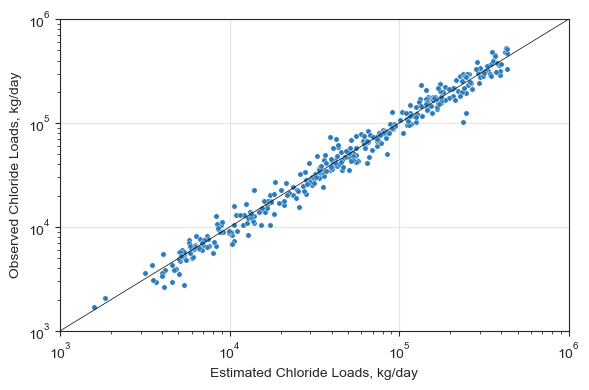

In [105]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
sns.scatterplot(y='Fx_C', 
                x='Fx_Hat',
                data=EGRET_Sample,
                s=15,
                linewidth=0.3, ax=ax,
               color=sns.color_palette("Blues")[4])
# plt.legend("")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot([-100,100000000],[-100,100000000], 'k', lw=0.5)
min_lim, max_lim = 1e3, 1e6
plt.xlim(min_lim,max_lim)
plt.ylim(min_lim,max_lim)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.xlabel("Estimated Chloride Loads, kg/day")
plt.ylabel("Observed Chloride Loads, kg/day")
# plt.xlabel("")
plt.tight_layout()
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/Canada/'+river+'/'+river+'_FvsF.pdf')


In [106]:
EGRET_Daily['FluxYearMTA'] = EGRET_Daily['FluxDay']*365/1000
EGRET_Daily['Fx_SE'] = (np.exp(EGRET_Daily['SE']+EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000-np.exp(EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000)*365
EGRET_Daily_an = EGRET_Daily.groupby('waterYear').mean().reset_index()


EGRET_Daily_an

,waterYear,Unnamed: 0,Q,Julian,Month,Day,DecYear,MonthSeq,i,LogQ,Q7,Q30,yHat,SE,ConcDay,FluxDay,FNConc,FNFlux,FluxYearMTA,Fx_SE
0,2000,183.5,21.692975,54876.5,6.513661,183.500000,2000.249003,1803.497268,183.5,2.265818,21.657355,22.125546,3.691069,0.164485,43.113662,61274.331912,40.166396,69749.459868,22365.131148,3523.872015
1,2001,549.0,20.079448,55242.0,6.526027,183.838356,2001.248488,1815.501370,549.0,2.092648,20.354683,21.118836,3.643889,0.161721,40.073924,51889.419125,39.043546,67813.446753,18939.637981,3116.865270
2,2002,914.0,26.826246,55607.0,6.526027,183.838356,2002.248402,1827.501370,914.0,2.309449,26.922610,27.006451,3.509561,0.159658,35.379688,61472.023831,38.246521,72358.982852,22437.288698,3581.977095
3,2003,1279.0,10.815364,55972.0,6.526027,183.838356,2003.248402,1839.501370,1279.0,1.156060,10.801184,10.776373,3.713891,0.176632,42.800350,29556.494084,37.090449,66583.215326,10788.120341,1916.180250
4,2004,1644.5,30.097856,56337.5,6.513661,183.500000,2004.249003,1851.497268,1644.5,2.507278,30.112774,30.116130,3.509643,0.174108,35.212194,69094.558070,36.546095,68879.030206,25219.513696,4085.613365
5,2005,2010.0,29.304650,56703.0,6.526027,183.838356,2005.248488,1863.501370,2010.0,2.100313,29.275841,29.258065,3.570782,0.182458,36.872765,78687.131187,36.029613,69109.619785,28720.802883,4190.452537
6,2006,2375.0,30.984160,57068.0,6.526027,183.838356,2006.248402,1875.501370,2375.0,2.515381,30.947159,30.715323,3.499277,0.185444,34.389031,73569.229854,34.874436,64337.522813,26852.768897,4010.366494
7,2007,2740.0,38.431655,57433.0,6.526027,183.838356,2007.248402,1887.501370,2740.0,2.547765,38.497443,38.753983,3.444299,0.175547,32.360383,89009.838424,33.907466,64331.400713,32488.591025,4405.945414
8,2008,3105.5,33.221505,57798.5,6.513661,183.500000,2008.249003,1899.497268,3105.5,2.400086,33.203984,32.121659,3.443722,0.189992,32.911803,68130.391413,32.814796,60003.558630,24867.592866,4272.592935
9,2009,3471.0,43.721507,58164.0,6.526027,183.838356,2009.248488,1911.501370,3471.0,2.726118,43.733101,44.808253,3.348085,0.194521,29.757202,80348.925197,31.831567,55025.326468,29327.357697,5515.032275


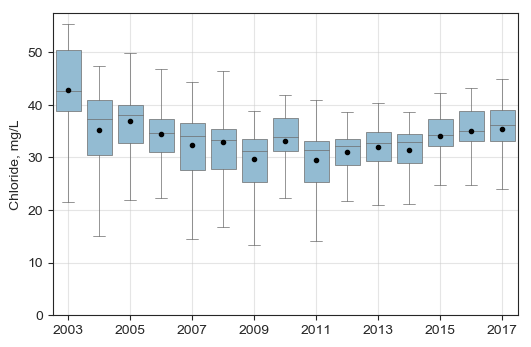

In [107]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

# sns.boxplot(EGRET_Daily['waterYear'], EGRET_Daily['ConcDay'], color=sns.color_palette()[0])

# plt.fill_between(EGRET_Daily_an['waterYear'][5:-1],
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]-EGRET_Daily_an['SE'][5:-1]),
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]+EGRET_Daily_an['SE'][5:-1]), 
#                  color=sns.color_palette()[0], alpha=0.15)
# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

meanpointprops = dict(marker='.', markeredgecolor='black', markersize=6,markerfacecolor='black')
ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", 
                 data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2],
                order=range(2003,2018))

# ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
# plt.xlim(2003,2018)
plt.xlim(-0.5, 14.5)
locs, labels = plt.xticks() 
plt.xticks(locs[::2], labels[::2])
plt.ylim(0,None)
# plt.vlines(4.5, 0, 0.6, 'k', '-.', lw=0.7)
# plt.vlines(9.5, 0, 0.6, 'k', '-.', lw=0.7)

# ax.set_xticks([int(x) for x in np.linspace(2003,2017, 8)])

plt.grid(alpha=0.5)
plt.ylabel("Chloride, mg/L")
plt.xlabel("")
# fig.autofmt_xdate()
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/Canada/'+river+'/'+river+'_Cl.pdf')



In [108]:
EGRET_Daily_an['Fx_AE'] = (abs(EGRET_Sample['Fx_Hat'] - EGRET_Sample['Fx_C'])/EGRET_Sample['Fx_C']).mean()*EGRET_Daily_an['FluxYearMTA']




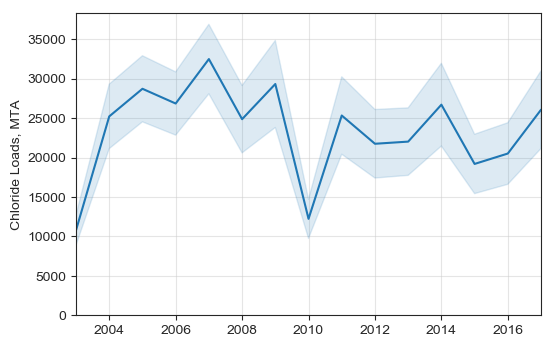

In [109]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

k=None
plt.plot(EGRET_Daily_an['waterYear'][:k], EGRET_Daily_an['FluxYearMTA'][:k], c=sns.color_palette()[0])

# s=12
# plt.plot(EGRET_Daily_an['waterYear'][s:], EGRET_Daily_an['FluxYearMTA'][s:], c=sns.color_palette()[0])

plt.fill_between(EGRET_Daily_an['waterYear'][:k],
                 EGRET_Daily_an['FluxYearMTA'][:k]-EGRET_Daily_an['Fx_SE'][:k],
                 EGRET_Daily_an['FluxYearMTA'][:k]+EGRET_Daily_an['Fx_SE'][:k], 
                 color=sns.color_palette()[0], alpha=0.15)

# plt.fill_between(EGRET_Daily_an['waterYear'][s:],
#                  EGRET_Daily_an['FluxYearMTA'][s:]-EGRET_Daily_an['Fx_SE'][s:],
#                  EGRET_Daily_an['FluxYearMTA'][s:]+EGRET_Daily_an['Fx_SE'][s:], 
#                  color=sns.color_palette()[0], alpha=0.15)



# plt.vlines(2007, 0, 200, 'k', '-.', lw=0.7)
# plt.vlines(2013, 0, 200, 'k', '-.', lw=0.7)


# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

# meanpointprops = dict(marker='D', markeredgecolor='black', markersize=1,markerfacecolor=sns.color_palette()[3])
# ax = sns.boxplot(linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="FluxYearMTA", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
plt.ylim(0,None)
plt.xlim(2003,2017)
# plt.xticks([int(x) for x in np.linspace(5,19,8)], [int(x) for x in np.linspace(2003,2017, 8)])
# plt.ylim(0,200)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Chloride Loads, MTA")
plt.xlabel("")
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/Canada/'+river+'/'+river+'_Cl_Flux.pdf')


In [110]:
print(EGRET_Daily_an[(EGRET_Daily_an.waterYear<2018) & (EGRET_Daily_an.waterYear>2002)][['waterYear', 'FluxYearMTA','Fx_SE']].round(1).T.to_latex(index=False))

\begin{tabular}{rrrrrrrrrrrrrrr}
\toprule
      3  &       4  &       5  &       6  &       7  &       8  &       9  &       10 &       11 &       12 &       13 &       14 &       15 &       16 &       17 \\
\midrule
  2003.0 &   2004.0 &   2005.0 &   2006.0 &   2007.0 &   2008.0 &   2009.0 &   2010.0 &   2011.0 &   2012.0 &   2013.0 &   2014.0 &   2015.0 &   2016.0 &   2017.0 \\
 10788.1 &  25219.5 &  28720.8 &  26852.8 &  32488.6 &  24867.6 &  29327.4 &  12228.9 &  25332.5 &  21748.7 &  22021.3 &  26705.8 &  19191.9 &  20509.7 &  26066.2 \\
  1916.2 &   4085.6 &   4190.5 &   4010.4 &   4405.9 &   4272.6 &   5515.0 &   2485.1 &   4908.5 &   4346.5 &   4279.7 &   5244.9 &   3764.7 &   3904.2 &   4921.7 \\
\bottomrule
\end{tabular}



In [111]:
print(TP.groupby('STATION')["RESULT"].describe().reindex(selected_stations).round(2).to_latex())
   

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  count &   mean &    std &    min &    25\% &    50\% &    75\% &    max \\
STATION    &        &        &        &        &        &        &        &        \\
\midrule
4002701702 &   95.0 &  22.59 &   8.24 &   9.00 &  15.60 &  22.10 &  28.25 &   47.4 \\
ON02GC1800 &   20.0 &  23.32 &   4.71 &  15.50 &  19.65 &  23.75 &  26.70 &   33.0 \\
4002700602 &    2.0 &  36.20 &   9.90 &  29.20 &  32.70 &  36.20 &  39.70 &   43.2 \\
ON02GG1000 &  360.0 &  29.23 &   7.57 &   8.83 &  23.58 &  29.35 &  33.82 &   59.7 \\
02GG003    &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN \\
4002700802 &   97.0 &  53.57 &  20.27 &  17.90 &  38.40 &  49.90 &  65.80 &  125.0 \\
02GG013    &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN \\
02GG009    &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN \\
4002700402 &   94.0 &  54.69 &  19.91 &  20.50 &  39.32 &  50.05 &  66.15 &  133.0 \\
02GG006    &  